In [1]:
import pandas as pd

In [2]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Arrests.csv")

In [4]:
df

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...
5221,5222,Yes,White,2000,17,Male,Yes,Yes,0
5222,5223,Yes,White,2000,21,Female,Yes,Yes,0
5223,5224,Yes,Black,1999,21,Female,Yes,Yes,1
5224,5225,No,Black,1998,24,Male,Yes,Yes,4


In [5]:
df.set_index('Unnamed: 0')

,released,colour,year,age,sex,employed,citizen,checks
Unnamed: 0,,,,,,,,
1,Yes,White,2002,21,Male,Yes,Yes,3
2,No,Black,1999,17,Male,Yes,Yes,3
3,Yes,White,2000,24,Male,Yes,Yes,3
4,No,Black,2000,46,Male,Yes,Yes,1
5,Yes,Black,1999,27,Female,Yes,Yes,1
...,...,...,...,...,...,...,...,...
5222,Yes,White,2000,17,Male,Yes,Yes,0
5223,Yes,White,2000,21,Female,Yes,Yes,0
5224,Yes,Black,1999,21,Female,Yes,Yes,1


In [13]:
#released grouped by year
g1=df[df['released']=='Yes'].groupby('year').size()

In [16]:
g1

year
1997     376
1998     723
1999     915
2000    1092
2001    1006
2002     222
dtype: int64

<Axes: xlabel='year'>

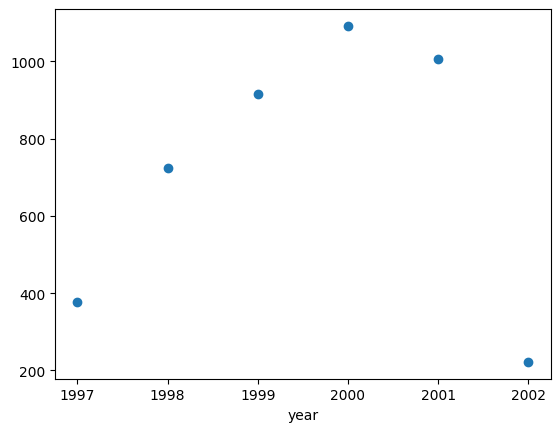

In [15]:
g1.plot(style='o')

In [78]:
#released citizen groupby year
df.loc[(df['citizen']=='Yes') & (df['released']=='Yes')].groupby('year').size()

year
1997     142
1998     667
1999     830
2000    1013
2001     924
2002     199
dtype: int64

In [19]:
#No of records in each year
df.groupby('year').size()

year
1997     492
1998     877
1999    1099
2000    1270
2001    1211
2002     277
dtype: int64

In [24]:
df[(df['employed']=='No') and (df['citizen']=='Yes')].groupby('released').size()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
#No of unemployed citizens grouped by sex
df.loc[(df['employed']=='No') & (df['citizen']=='Yes')].groupby('sex').size()

sex
Female    104
Male      787
dtype: int64

In [36]:
#No of released unemployed citizens
df.loc[(df['employed']=='No') & (df['citizen']=='Yes') & (df['released']=='Yes')]['sex'].count()

635

In [43]:
(df['released'=='Yes']['colour'].value_counts()/df['released'=='Yes']['colour'].count())*100

KeyError: False

In [41]:
df['colour'].value_counts()

colour
White    3938
Black    1288
Name: count, dtype: int64

In [49]:
#Percentage of released people grouped by colour
(df.loc[df['released']=='Yes']['colour'].value_counts())/(df.loc[df['released']=='Yes']['colour'].count())*100

colour
White    77.964928
Black    22.035072
Name: count, dtype: float64

In [50]:
#Percentage of released people grouped by sex
(df.loc[df['released']=='Yes']['sex'].value_counts())/(df.loc[df['released']=='Yes']['sex'].count())*100

sex
Male      91.232118
Female     8.767882
Name: count, dtype: float64

In [52]:
#people released in 2000 grouped by colour
df.loc[(df['released']=='Yes') & (df['year']==2000)]['colour'].value_counts()

colour
White    884
Black    208
Name: count, dtype: int64

In [53]:
#people released in 2000 grouped by sex
df.loc[(df['released']=='Yes') & (df['year']==2000)]['sex'].value_counts()

sex
Male      997
Female     95
Name: count, dtype: int64

In [54]:
##people released in 200 grouped by checks
df.loc[(df['released']=='Yes') & (df['year']==2000)]['checks'].value_counts()

checks
0    420
1    213
3    176
2    172
4     95
5     14
6      2
Name: count, dtype: int64

<Axes: xlabel='checks'>

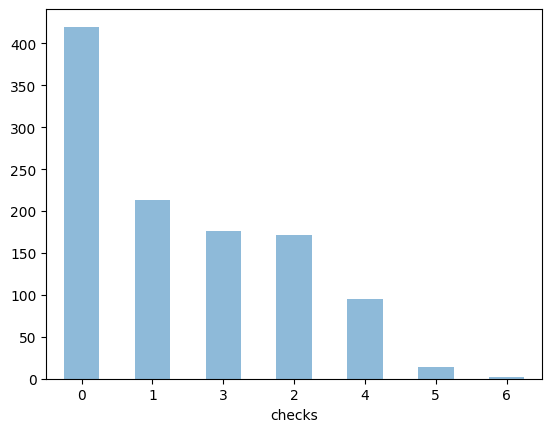

In [58]:
df.loc[(df['released']=='Yes') & (df['year']==2000)]['checks'].value_counts().plot(kind='bar', alpha=0.5, rot=0)

In [59]:
#people released in 2000 grouped by citizen
df.loc[(df['released']=='Yes') & (df['year']==2000)]['citizen'].value_counts()

citizen
Yes    1013
No       79
Name: count, dtype: int64

In [60]:
#people released in 2000 grouped by employed
df.loc[(df['released']=='Yes') & (df['year']==2000)]['employed'].value_counts()

employed
Yes    926
No     166
Name: count, dtype: int64

In [68]:
#unreleased people categorized by age
bins = pd.IntervalIndex.from_tuples([(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)])
unrAge=df[df['released']=='No'].age
unrAge=pd.cut(unrAge, bins)

In [73]:
g2=unrAge.groupby(by=unrAge.values).size()

<Axes: >

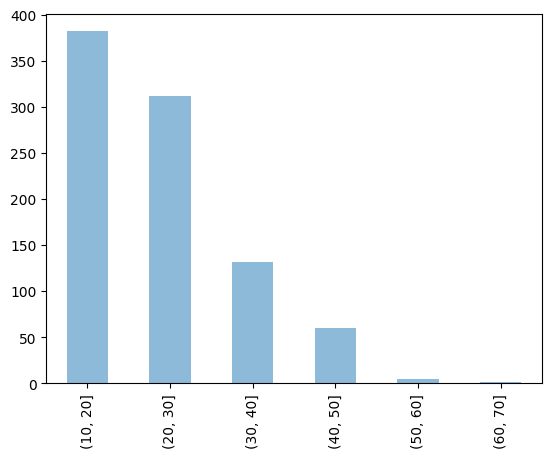

In [77]:
g2.plot(kind='bar', alpha=0.5)

In [116]:
list(df.columns)

['Unnamed: 0',
 'released',
 'colour',
 'year',
 'age',
 'sex',
 'employed',
 'citizen',
 'checks']

In [124]:
df.loc[df['released']=='Yes'].groupby([df.year, df.colour, df.sex]).size().transform(lambda x: x/x.sum()*100)

year  colour  sex   
1997  Black   Female     0.115367
              Male       1.822796
      White   Female     0.576834
              Male       6.160591
1998  Black   Female     0.392247
              Male       3.368713
      White   Female     1.522843
              Male      11.398246
1999  Black   Female     0.276880
              Male       3.922473
      White   Female     1.661283
              Male      15.251500
2000  Black   Female     0.253807
              Male       4.545455
      White   Female     1.938163
              Male      18.458699
2001  Black   Female     0.276880
              Male       5.514536
      White   Female     1.453623
              Male      15.966774
2002  Black   Female     0.046147
              Male       1.499769
      White   Female     0.253807
              Male       3.322566
dtype: float64

<Axes: xlabel='year,colour,sex'>

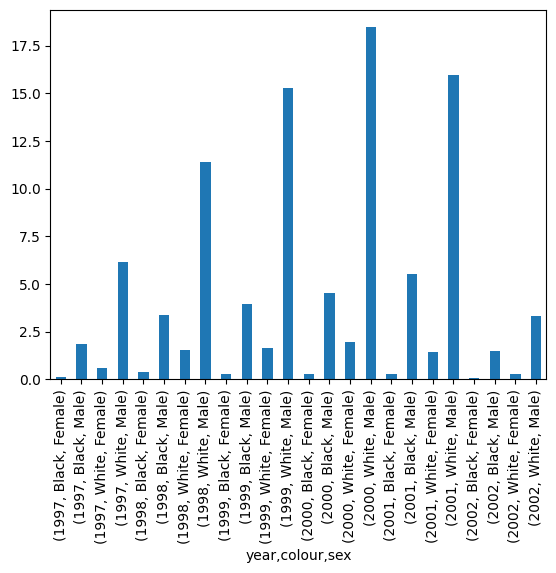

In [123]:
df.loc[df['released']=='Yes'].groupby([df.year, df.colour, df.sex]).size().transform(lambda x: x/x.sum()*100).plot(kind='bar')

In [130]:
df.groupby([df.released, df.year, df.colour, df.sex]).size().transform(lambda x: x/x.sum()*100)

released  year  colour  sex   
No        1997  Black   Male       0.746269
                White   Female     0.038270
                        Male       1.435132
          1998  Black   Female     0.095675
                        Male       1.377727
                White   Female     0.133946
                        Male       1.339457
          1999  Black   Female     0.038270
                        Male       1.262916
                White   Female     0.267891
                        Male       1.951780
          2000  Black   Female     0.019135
                        Male       1.339457
                White   Female     0.172216
                        Male       1.875239
          2001  Black   Female     0.057405
                        Male       1.090700
                White   Female     0.287026
                        Male       2.487562
          2002  Black   Female     0.038270
                        Male       0.306162
                White   Female     0.057405
 

In [131]:
s2=df.groupby([df.released, df.year, df.colour, df.sex]).size().transform(lambda x: x/x.sum()*100)

In [134]:
df2=pd.DataFrame(s2)

In [142]:
df2

0
released year colour sex              
No       1997 Black  Male     0.746269
              White  Female   0.038270
                     Male     1.435132
         1998 Black  Female   0.095675
                     Male     1.377727
              White  Female   0.133946
                     Male     1.339457
         1999 Black  Female   0.038270
                     Male     1.262916
              White  Female   0.267891
                     Male     1.951780
         2000 Black  Female   0.019135
                     Male     1.339457
              White  Female   0.172216
                     Male     1.875239
         2001 Black  Female   0.057405
                     Male     1.090700
              White  Female   0.287026
                     Male     2.487562
         2002 Black  Female   0.038270
                     Male     0.306162
              White  Female   0.057405
                     Male     0.650593
Yes      1997 Black  Female   0.095675
                     Male     1.511672
              White  Female   0.478377
                     Male     5.109070
         1998 Black  Female   0.325297
                     Male     2.793724
              White  Female   1.262916
                     Male     9.452736
         1999 Black  Female   0.229621
                     Male     3.252966
              White  Female   1.377727
                     Male    12.648297
         2000 Black  Female   0.210486
                     Male     3.769613
              White  Female   1.607348
                     Male    15.308075
         2001 Black  Female   0.229621
                     Male     4.573287
              White  Female   1.205511
                     Male    13.241485
         2002 Black  Female   0.038270
                     Male     1.243781
              White  Female   0.210486
                     Male     2.755454

In [144]:
df2.unstack().unstack().fillna(0)

0                               
sex              Female                Male           
colour            Black     White     Black      White
released year                                         
No       1997  0.000000  0.038270  0.746269   1.435132
         1998  0.095675  0.133946  1.377727   1.339457
         1999  0.038270  0.267891  1.262916   1.951780
         2000  0.019135  0.172216  1.339457   1.875239
         2001  0.057405  0.287026  1.090700   2.487562
         2002  0.038270  0.057405  0.306162   0.650593
Yes      1997  0.095675  0.478377  1.511672   5.109070
         1998  0.325297  1.262916  2.793724   9.452736
         1999  0.229621  1.377727  3.252966  12.648297
         2000  0.210486  1.607348  3.769613  15.308075
         2001  0.229621  1.205511  4.573287  13.241485
         2002  0.038270  0.210486  1.243781   2.755454

<Axes: xlabel='colour,employed,citizen'>

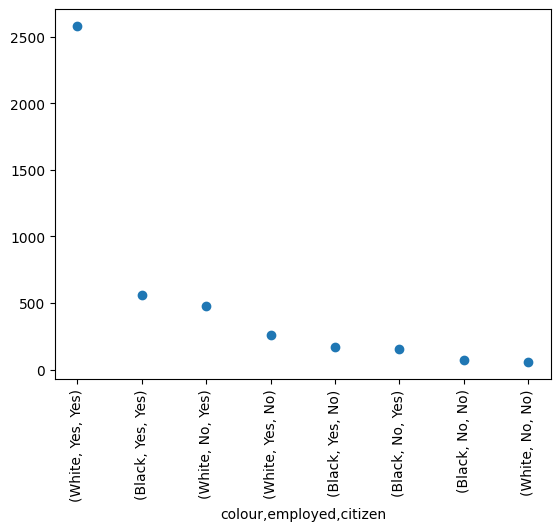

In [91]:
df.loc[df['released']=='Yes'][['colour', 'employed', 'citizen']].value_counts().plot(rot=90, style='o')

Series([], Name: count, dtype: int64)